In [5]:
import numpy as np
from matplotlib import pyplot as plt 

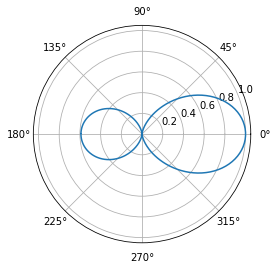

In [6]:
def patternHorizPolMark1(theta, R, H, Ptag, pLossFactor,fc, Lcable, Dant, Patmo):

    # The array is located in the XY-plane with the elements pointing
    # along Y and the boom forward direction along X

    # H is the height of the tag below the XY-plane
    # R is the range from the array centre to the tag in the XY plane
    # Dp/Dn are the distances to the tag from the elements.
    # Dant is the distance between the antenna elements
    # phic is the cable phase difference (radians)

    # Model the pattern by  rotating the tag (and not the array) at fixed
    # radius in XY plane (fixed altitude H).

    # For a horizontally polarised array, a tag produces maximum signal
    # when it is oriented parallel to an array element and perpendicular
    # to the Dp/Dm vectors. 

    # At each point in the scan, reorient the tag for maximum signal.
    # We assume that the tag maintains this orientation as it rotates in
    # the XY plane around the array.

    # Assume Dant << sqrt(H**2 + R**2) so that each element sees the same
    # E-field magnitude and orientation (but not phase) from the tag. 
  
    cc = 2e8; #cable speed of light
    cv = 3e8; #vacuum speed of light
    Lc = cc / fc;  
    Lv = cv / fc; 
    kv = 2 * np.pi / Lv;
    Nsams = len(theta);

    phic =  2 * np.pi * Lcable / Lc; 
    Rp = np.sqrt( (R * np.cos(theta) - Dant / 2)**2 + (R * np.sin(theta))**2 );
    Rm = np.sqrt( (R * np.cos(theta) + Dant / 2)**2 + (R * np.sin(theta))**2 );

    Dp = np.sqrt( H**2 + Rp**2 );
    Dm = np.sqrt( H**2 + Rm**2 );

    pLossp = (Lv/4/np.pi/Dp)**pLossFactor;
    pLossm = (Lv/4/np.pi/Dm)**pLossFactor;

    # Rotate the tag with maximum polarisation
    Ep = np.exp(1j * kv * Dp) * np.sqrt(Ptag * pLossp) * np.cos(theta); 
    Em = np.exp(1j * kv * Dm) * np.sqrt(Ptag * pLossm) * np.cos(theta);

    # Put the cable phase factor in forward direction
    Ep = Ep * np.exp(1j * phic);
   
    #noiseP = randn(1,Nsams) + 1j * randn(1, Nsams);
    #PnoiseP = np.mean(abs(noiseP**2));
    #noiseP = np.sqrt(Patmo / PnoiseP) * noiseP;

    #noiseM = randn(1,Nsams) + 1j * randn(1, Nsams);
    #PnoiseM = np.mean(abs(noiseM**2));
    #noiseM = np.sqrt(Patmo / PnoiseM) * noiseM; 

    #Ep = Ep + noiseP;
    #Em = Em + noiseM;

    # The mark1 summer and subractor    
    summer      = Ep + Em;
    subtractor  = Ep - Em;

    PbeamS = abs(summer**2);
    # PbeamD = abs(subtractor**2);
    
    # normalize to [0,1]
    PbeamS_max = np.max(PbeamS)
    PbeamS_min = np.min(PbeamS)
    PbeamS_range = PbeamS_max - PbeamS_min
    PbeamS = (PbeamS-PbeamS_min) / PbeamS_range;
    
    return PbeamS

#############################################

aoa = np.arange(-np.pi,np.pi,np.pi*2/360)

Ptag = 1; #use uW (microW).

H = 600
R = 200
pLossFactor = 2
fc = 151e6
Dant    = .50;
Lcable  = 0.2;

FAMdB = 0                                   #Noise figure of atmo. above thermal
Tamb = 300;                                 #ambient temperature (Kelvin) 
kB = 1.38e-23;                              #Boltzmann's constant J/oK
Tpulse = 0.0135;                            #Tag pulse frequency (time

BW = 2/Tpulse;                              #Tag occupied bandwidth
Patmo = 10**(FAMdB/10) * kB * Tamb * BW;     #Ambient noise power in tag bandwidth
Patmo_dBm = 10*np.log10(Patmo / 0.001);

PbeamHS = patternHorizPolMark1(aoa, R, H, Ptag, pLossFactor, fc, Lcable, Dant, Patmo);

plt.figure()
plt.polar(aoa,PbeamHS)
#plt.polar(aoa,PbeamHD)
plt.show()